#### 单隐层的神经网络-Numpy
##### 思路

- 定义网络结构（指定输出层、隐藏层、输出层的大小）

- 初始化模型参数

- 循环操作：执行前向传播/计算损失/执行后向传播/权值更新


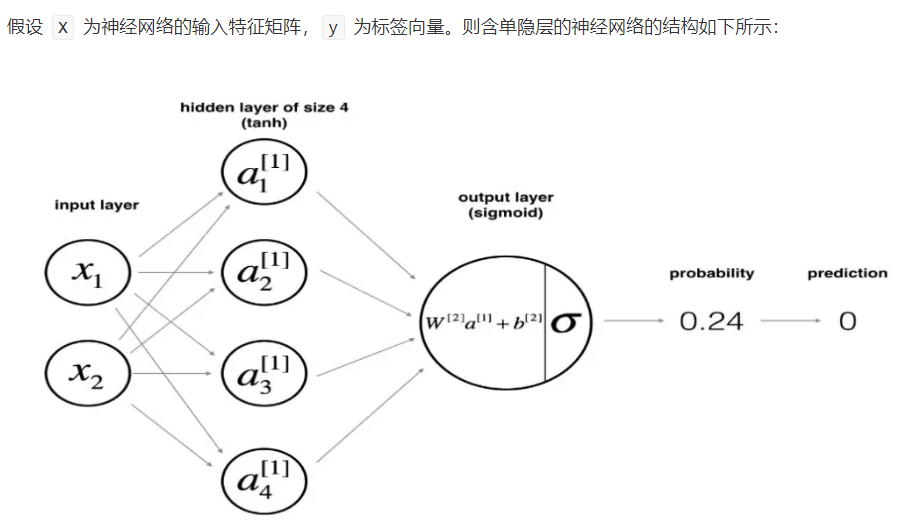

##### 网络结构的函数

In [7]:
import numpy as np

def layer_sizes(X,Y):
    n_x=X.shape[0]   # size of input layer
    n_h=4           # size of hidden layer
    n_y=Y.shape[0] # size of output layer
    return (n_x,n_h,n_y)

##### 初始化模型参数

- W1 为输入层到隐层的权重数组
- b1 为输入层到隐层的偏置数组
- W2 为隐层到输出层的权重数组
- b2 为隐层到输出层的偏置数组

In [22]:
def initialize_parameters(n_x,n_h,b_y):
    W1=np.random.randn(n_h,n_x)*0.01   # 输入层 -- 隐层
    print(W1)
    b1=np.zeros((n_h,1))               # 输入层 -- 隐层
    W2=np.random.randn(n_y,n_h)*0.01   # 隐层 --- 输出层 
    print(W2)
    b2=np.zeros(n_y,1)                 # 隐层 --- 输出层 
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters = {"W1": W1, 
                  "b1": b1,                 
                  "W2": W2,                  
                  "b2": b2}   
                   
    return parameters
           
# Test        
W1=np.random.randn(4,2)*0.01   # 输入层 -- 隐层
print(W1)
b1=np.zeros((4,1))               # 输入层 -- 隐层
print(b1)
W2=np.random.randn(1,4)*0.01   # 隐层 --- 输出层 
print(W2)
b2=np.zeros((1,4))
print(b2)

[[-0.00444408 -0.00432438]
 [-0.00276615 -0.00320031]
 [-0.00640446 -0.01151193]
 [ 0.0071295   0.00149226]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[ 0.02275661  0.00487254 -0.01029269  0.01172819]]
[[0. 0. 0. 0.]]


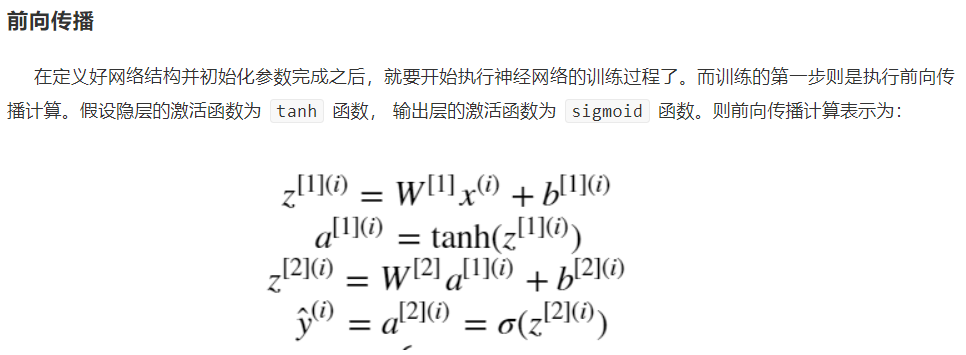

In [24]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, Z1) + b2
    A2 = sigmoid(Z2)    
    assert(A2.shape == (1, X.shape[1]))


    cache = {"Z1": Z1,                   
             "A1": A1,                   
             "Z2": Z2,                  
             "A2": A2}    

    return A2, cache

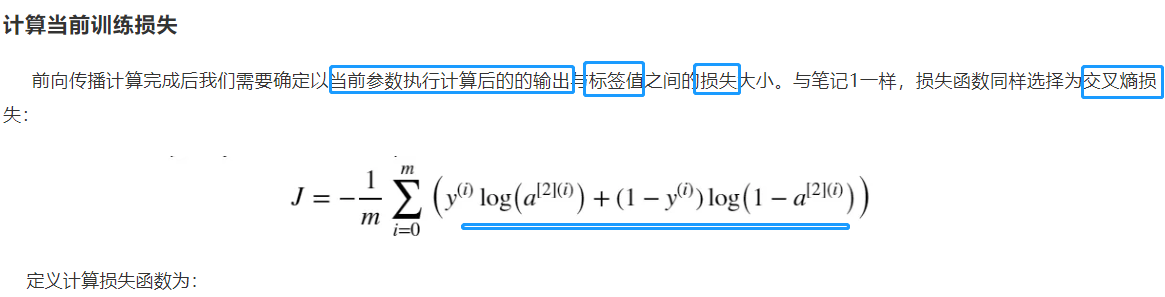

In [25]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.

    assert(isinstance(cost, float))    
    return cost

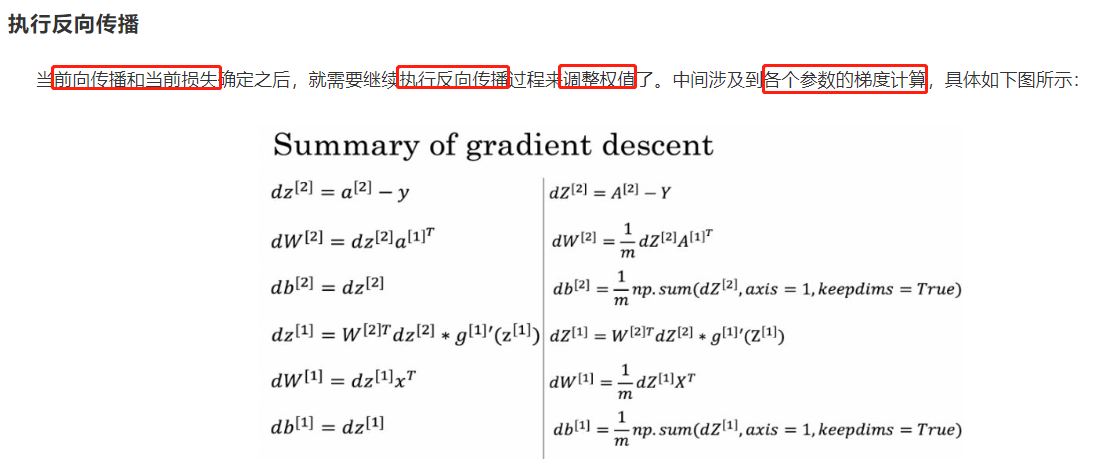

In [27]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,                      
             "dW2": dW2,             
             "db2": db2}   
    return grads

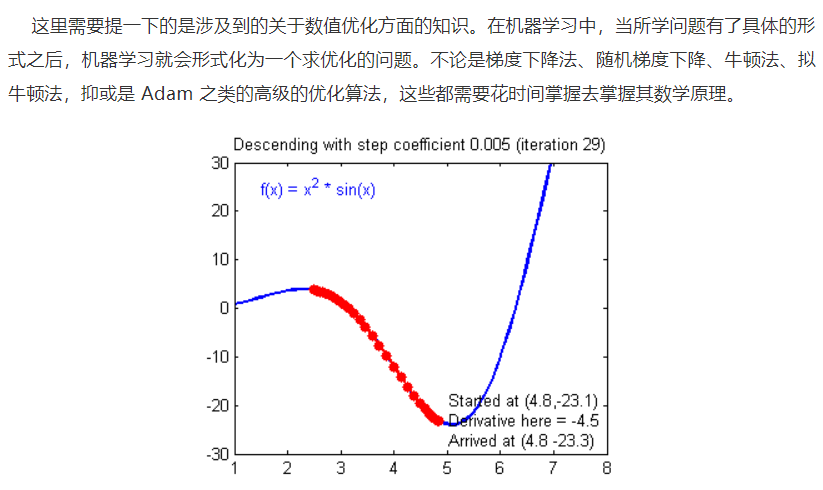

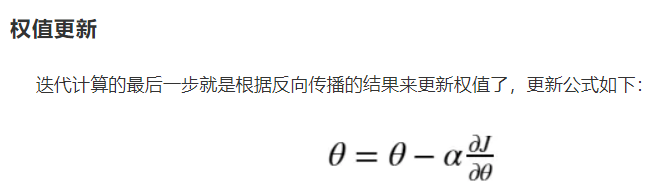

In [28]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']    
    # Update rule for each parameter
    W1 -= dW1 * learning_rate
    b1 -= db1 * learning_rate
    W2 -= dW2 * learning_rate
    b2 -= db2 * learning_rate

    parameters = {"W1": W1, 
                  "b1": b1,            
                  "W2": W2,   
                  "b2": b2}    
    return parameters

- 【以上】前向传播-计算损失-反向传播-权值更新
- 【如下】模块组合-神经网络模型

In [30]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    # Loop (gradient descent)
    for i in range(0, num_iterations):        
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate=1.2)        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))    
            
    return parameters